# Lab - Customer Analysis Round 4 

In [1]:
import pandas as pd
import numpy as np
datalab2 = pd.read_csv('datalab2.csv')

In [2]:
# Check the data types of the columns. Get the numeric data into dataframe called numerical and categorical columns in a 
# dataframe called categoricals. (You can use np.number and np.object to select the numerical data types and categorical data
# types respectively)

datalab2.dtypes

Unnamed: 0                         int64
customer                          object
state                             object
customer lifetime value          float64
response                          object
coverage                          object
education                         object
effective to date                 object
employmentstatus                  object
gender                            object
income                             int64
location code                     object
marital status                    object
monthly premium auto               int64
months since last claim          float64
months since policy inception      int64
number of open complaints        float64
number of policies                 int64
policy type                       object
policy                            object
renew offer type                  object
sales channel                     object
total claim amount               float64
vehicle class                     object
vehicle size    

In [3]:
numerical = pd.DataFrame(datalab2.select_dtypes(include=np.number))
numerical.drop(['Unnamed: 0'], axis=1 ,inplace=True)
numerical

,customer lifetime value,income,monthly premium auto,months since last claim,months since policy inception,number of open complaints,number of policies,total claim amount,month
0,4809.216960,48029,61,7.0,52,0.0,9,292.800000,2
1,2228.525238,0,64,3.0,26,0.0,1,744.924331,1
2,14947.917300,22139,100,34.0,31,0.0,2,480.000000,2
3,22332.439460,49078,97,10.0,3,0.0,2,484.013411,1
4,5035.035257,37405,63,8.0,99,3.0,4,287.556107,2
...,...,...,...,...,...,...,...,...,...
9129,2771.663013,59855,74,30.0,82,4.0,1,355.200000,1
9130,19228.463620,0,187,14.0,32,0.0,2,897.600000,2
9131,5259.444853,61146,65,7.0,68,0.0,6,273.018929,1
9132,23893.304100,39837,201,11.0,63,0.0,2,381.306996,2


In [4]:
import warnings
warnings.filterwarnings('ignore')

categorical = pd.DataFrame(datalab2.select_dtypes(include=np.object))
categorical

,customer,state,response,coverage,education,effective to date,employmentstatus,gender,location code,marital status,policy type,policy,renew offer type,sales channel,vehicle class,vehicle size
0,DK49336,Arizona,No,Basic,College,2011-02-18,Employed,M,Suburban,Married,Corporate Auto,Corporate L3,Offer3,Agent,Four-Door Car,Medsize
1,KX64629,California,No,Basic,College,2011-01-18,Unemployed,F,Suburban,Single,Personal Auto,Personal L3,Offer4,Call Center,Four-Door Car,Medsize
2,LZ68649,Washington,No,Basic,Bachelor,2011-02-10,Employed,M,Suburban,Single,Personal Auto,Personal L3,Offer3,Call Center,SUV,Medsize
3,XL78013,Oregon,Yes,Extended,College,2011-01-11,Employed,M,Suburban,Single,Corporate Auto,Corporate L3,Offer2,Branch,Four-Door Car,Medsize
4,IW72280,California,No,Basic,Doctor,2011-02-14,Employed,F,Urban,Married,Corporate Auto,Corporate L2,Offer2,Branch,Four-Door Car,Medsize
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9129,SU71163,Arizona,No,Basic,College,2011-01-07,Employed,M,Suburban,Married,Personal Auto,Personal L2,Offer2,Branch,Two-Door Car,Medsize
9130,QI63521,Nevada,No,Basic,High School or Below,2011-02-24,Unemployed,M,Suburban,Single,Personal Auto,Personal L2,Offer1,Branch,Luxury SUV,Medsize
9131,KX53892,Oregon,No,Basic,College,2011-01-06,Employed,F,Urban,Married,Personal Auto,Personal L3,Offer2,Branch,Four-Door Car,Medsize
9132,TL39050,Arizona,No,Extended,Bachelor,2011-02-06,Employed,F,Rural,Married,Corporate Auto,Corporate L3,Offer1,Web,Luxury SUV,Medsize


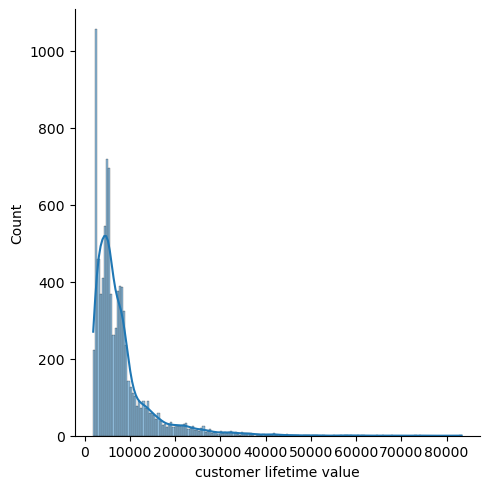

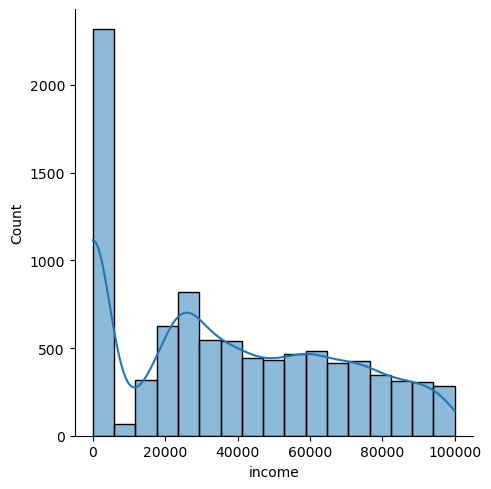

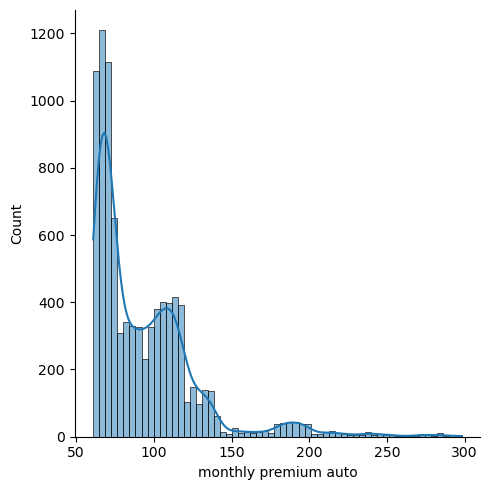

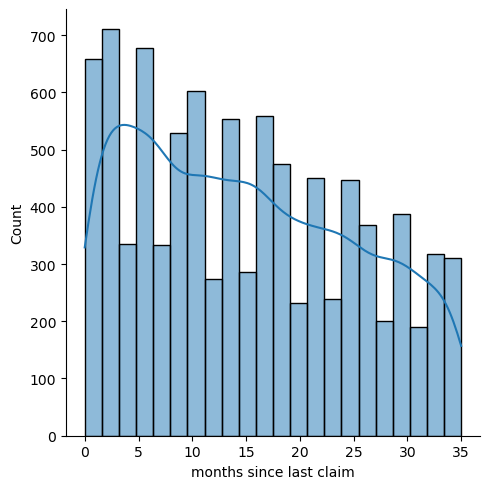

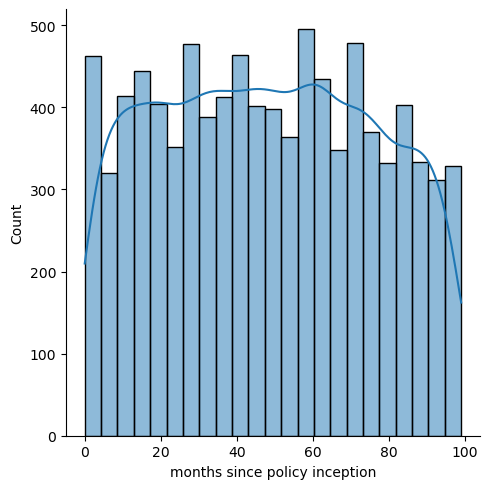

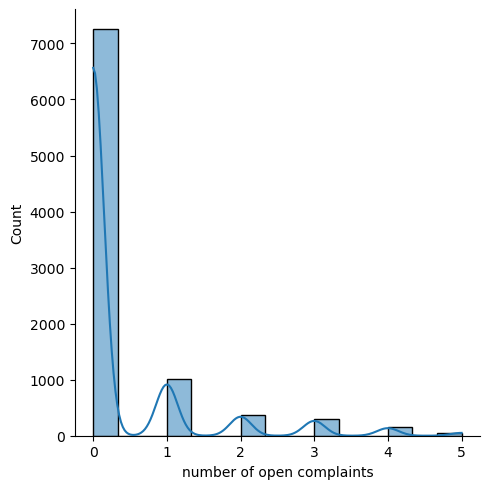

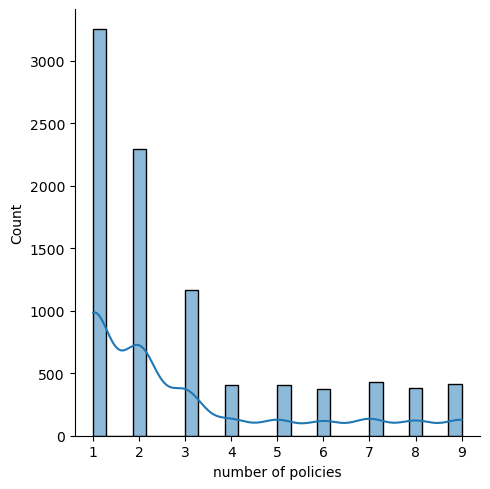

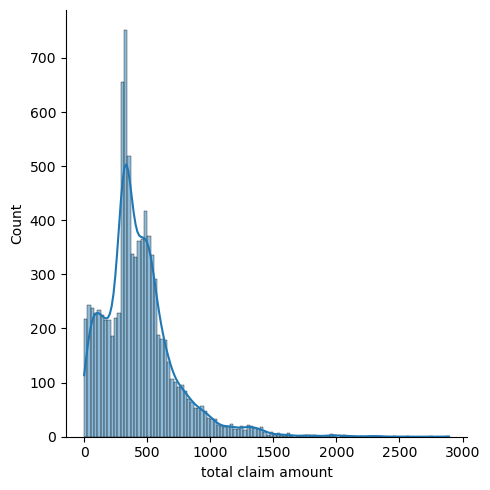

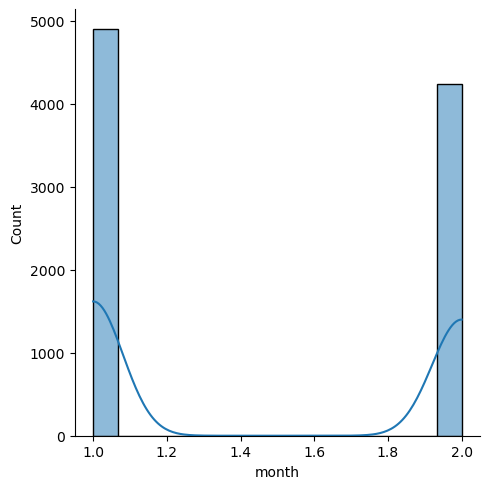

In [5]:
# Use seaborn library to construct distribution plots for the numerical variables

import seaborn as sns
import matplotlib.pyplot as plt

for col in numerical.columns:
    sns.displot(numerical[col], kde=True)
    plt.show()

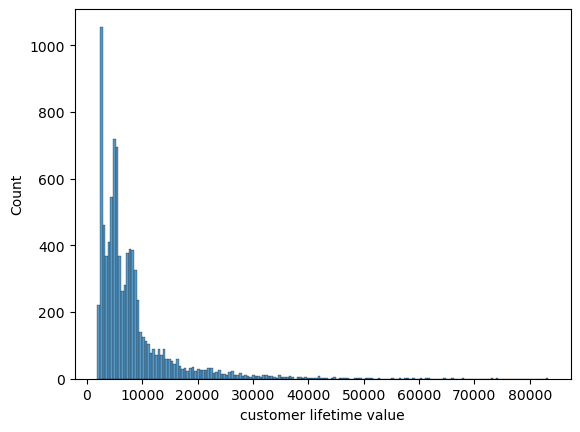

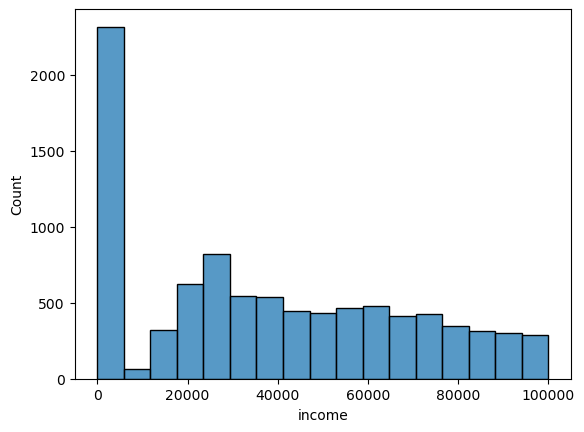

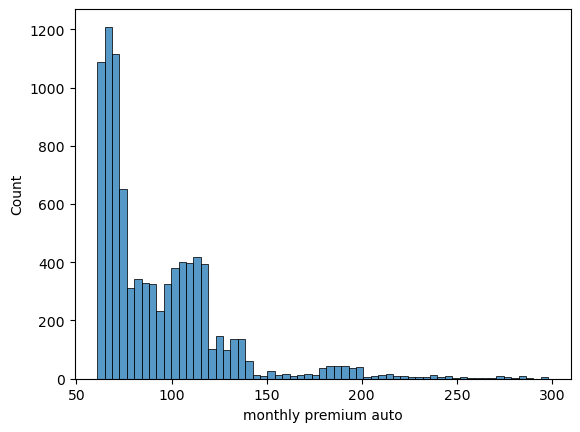

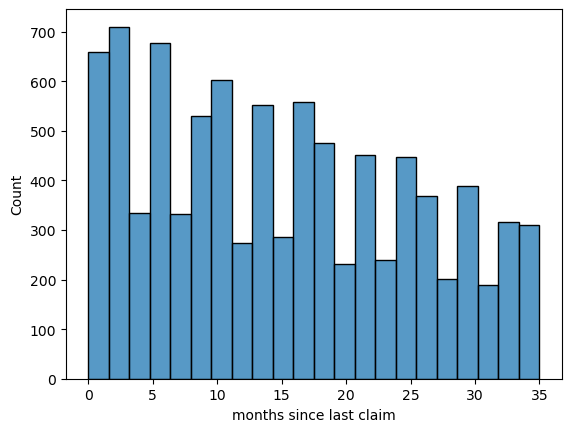

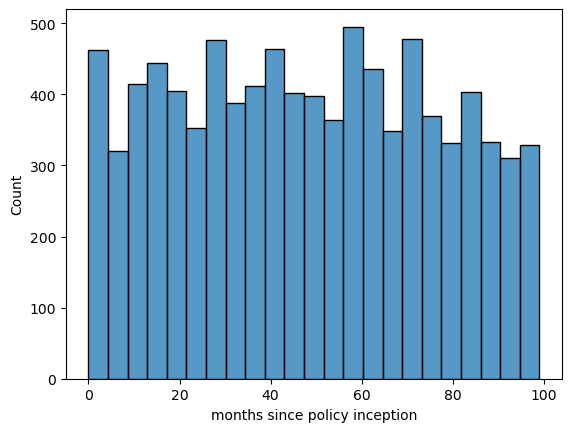

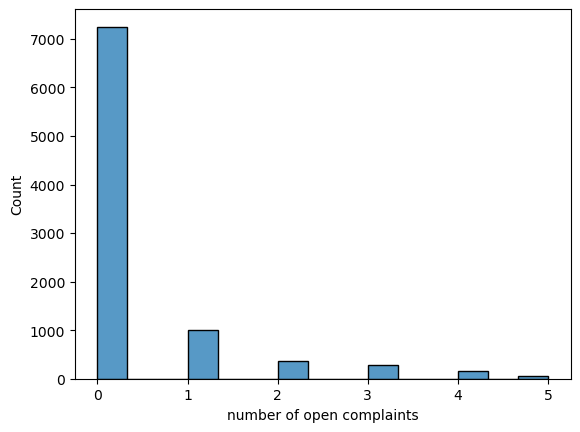

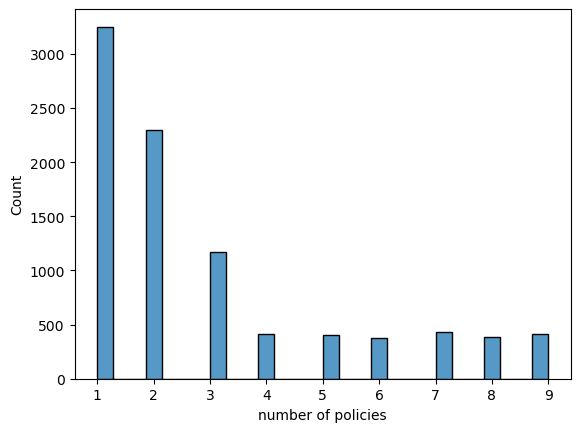

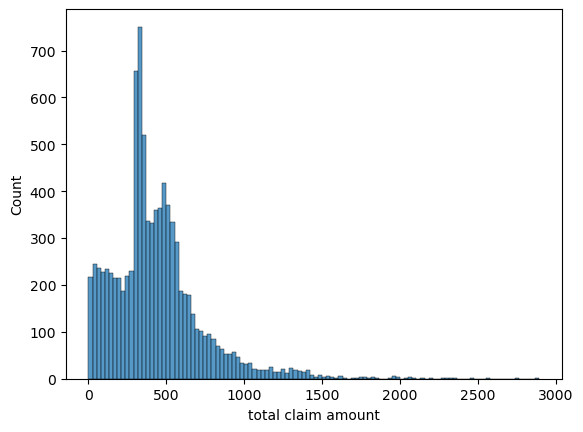

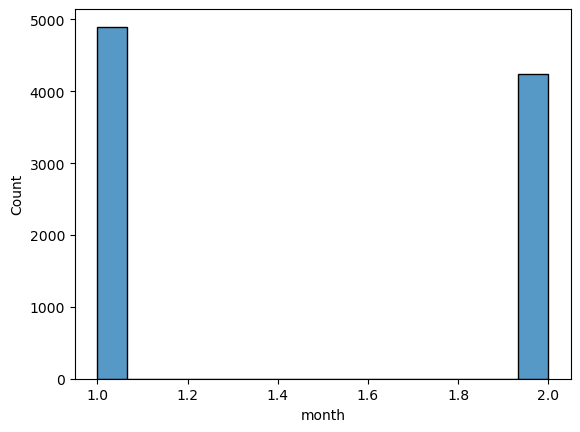

In [6]:
# Use Matplotlib to construct histograms

for col in numerical.columns:
    sns.histplot(numerical[col])
    plt.show()

In [7]:
# Do the distributions for different numerical variables look like a normal distribution

# No, by looking at the distribution lines in the first set of charts we can see there is no shape of a normal distribution.

In [8]:
# For the numerical variables, check the multicollinearity between the features. Please note that we will use the 
# column total_claim_amount later as the target variable.

# no significant multicollinearity between variavles besides "total_claim_amount" was found.

numerical.corr()

,customer lifetime value,income,monthly premium auto,months since last claim,months since policy inception,number of open complaints,number of policies,total claim amount,month
customer lifetime value,1.000000,0.024366,0.396262,0.011517,0.009418,-0.036343,0.021955,0.226451,-0.006096
income,0.024366,1.000000,-0.016665,-0.026715,-0.000875,0.006408,-0.008656,-0.355254,0.000169
monthly premium auto,0.396262,-0.016665,1.000000,0.005026,0.020257,-0.013122,-0.011233,0.632017,0.011467
months since last claim,0.011517,-0.026715,0.005026,1.000000,-0.042959,0.005354,0.009136,0.007563,-0.020921
months since policy inception,0.009418,-0.000875,0.020257,-0.042959,1.000000,-0.001158,-0.013333,0.003335,0.011010
number of open complaints,-0.036343,0.006408,-0.013122,0.005354,-0.001158,1.000000,0.001498,-0.014241,-0.006335
number of policies,0.021955,-0.008656,-0.011233,0.009136,-0.013333,0.001498,1.000000,-0.002354,0.009305
total claim amount,0.226451,-0.355254,0.632017,0.007563,0.003335,-0.014241,-0.002354,1.000000,0.006820
month,-0.006096,0.000169,0.011467,-0.020921,0.011010,-0.006335,0.009305,0.006820,1.000000


No correlation higher than 0.9 was found.
Maximum correlation is 0.6320166625194121


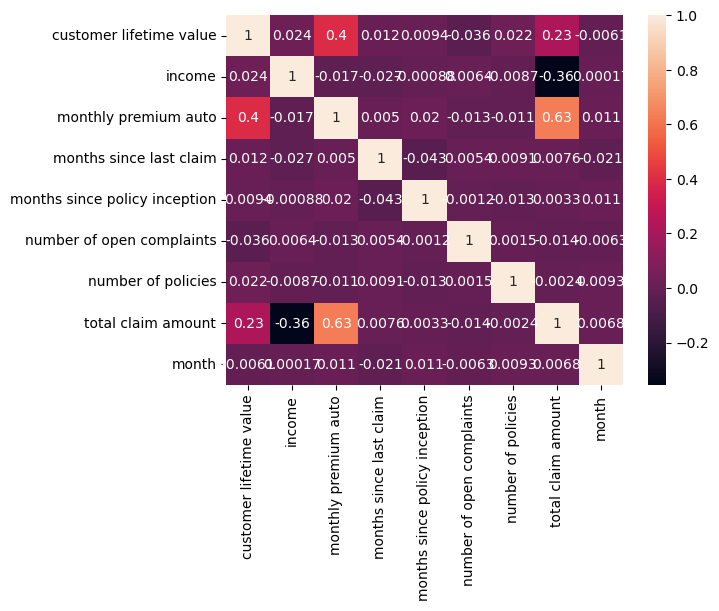

In [12]:
# Drop one of the two features that show a high correlation between them (greater than 0.9). Write code for both the 
# correlation matrix and for seaborn heatmap. If there is no pair of features that have a high correlation, then do not drop 
# any features

xcols = []
ycols = []
correlation = []
for x in range(len(numerical.columns)):
    for y in range(len(numerical.corr())):
        if x != y:
            r=numerical[numerical.columns[x]].corr(numerical[numerical.columns[y]])
            correlation.append(r)
            xcols.append(numerical.columns[x])
            ycols.append(numerical.columns[y])
        else:
            pass

counter = 0        
for i in range(len(correlation)):
    if correlation[i] > 0.9:
        print(xcols[i],' and ',ycols[i],' have a correlation of ',correlation[i])
        counter += 1
    else:
        pass

if counter == 0:
    print('No correlation higher than 0.9 was found.')
else:
    print(counter/2,' correlations higher than 0.9 were found.')

print('Maximum correlation is',max(correlation))

sns.heatmap(numerical.corr(), annot=True)
plt.show()